# IMPORTING DATA

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#read csv file
df=pd.read_csv("/Users/salonisharma/Downloads/adult - adult.csv")

In [3]:
#view first few rows
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#no. of rows and columns
df.shape

(32561, 15)

In [5]:
#statistics of dataframe
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#information such as data type, null values etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#converting target variable in numerical class
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['income'] = labelEncoder.fit_transform(df['income'])

# EXPLORATORY ANALYSIS

In [8]:
#importing libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [9]:
#Separating categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

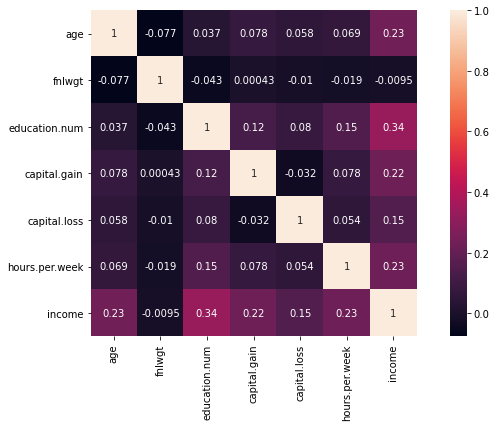

In [10]:
#correlation matrix
fig = plt.figure(figsize = (12,6))
sns.heatmap(df[list(num_col.index)].corr(),annot = True,square = True);

Strong correlation between Age and Hours per week, education num and hours per week & capital gain and hours per week.

Moderate Correlation between capital loss and age & capital loss and hours per week.

Low correlation between capital loss and capital gain & fnlwgt with all variables.


In [11]:
#finding unique values of categorical columns
for col in list(cat_col.index):
    print(col.title())
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

Workclass
                  total   percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


Education
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


Marital.Status
                       total   percent
Married-civ-spouse     14976  0.459937
Never-married          10683  0.3

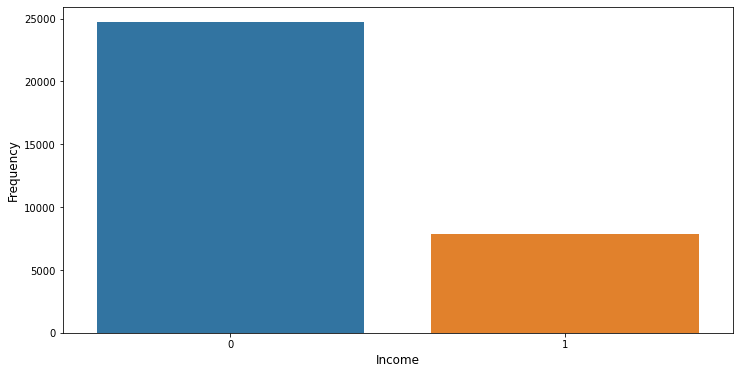

In [12]:
# plotting income
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

Around 25,000 people earn less than 50k in our dataset.

### Workclass

In [13]:
#Replacing "?" values with Mode 
df["workclass"].replace("?",df["workclass"].mode()[0],inplace = True)

<AxesSubplot:xlabel='workclass', ylabel='count'>

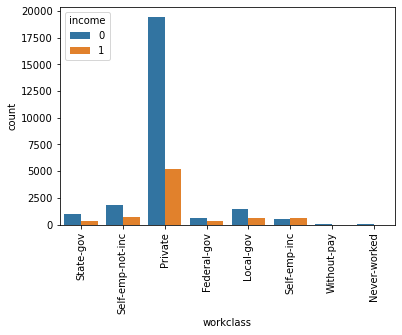

In [14]:
#rotating x labels
plt.xticks(rotation=90)

#plotting workclass against income
sns.countplot(x = 'workclass', hue = 'income', data = df)

More percentage of people in private workclass earn more than 50k than people in other workclass.

### Education

As Education Number and Education are just the same. So, we will remove one of the columns.

In [15]:
#dropping education number
df.drop(['education.num'], axis = 1, inplace = True)

We will combine all rows from Preschool to 12th as one class-who have no college/university level education.

In [16]:
#combining preschool to 12th as one class-school
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'School', inplace = True)

In [17]:
#checking value counts in education column
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
School           4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

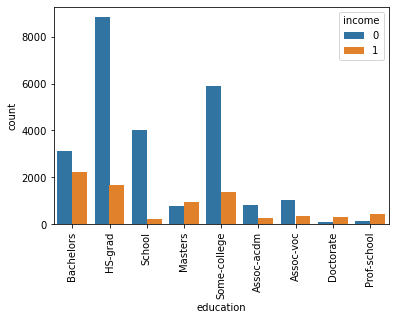

In [18]:
#rotating x labels
plt.xticks(rotation=90)

#plotting education against income
sns.countplot(x = 'education', hue = 'income', data = df)

 More percentage of people having Bachelors education earn more than 50k.

### Occupation

In [19]:
#Replacing "?" values with Mode 
df["occupation"].replace("?",df["occupation"].mode()[0],inplace = True)

<AxesSubplot:xlabel='occupation', ylabel='count'>

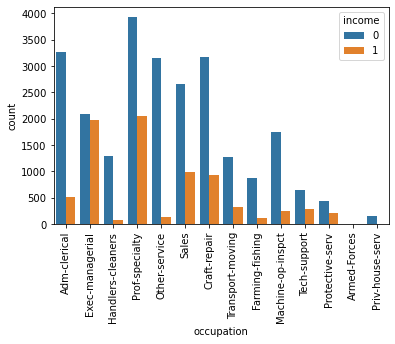

In [20]:
#rotating x labels
plt.xticks(rotation = 90)

#plotting occupation against income
sns.countplot(x = 'occupation', hue = 'income', data = df)

People having Prof-specialty and Exec-managerial as occupation earn more than 50k, than others.

### Race 

<AxesSubplot:xlabel='race', ylabel='count'>

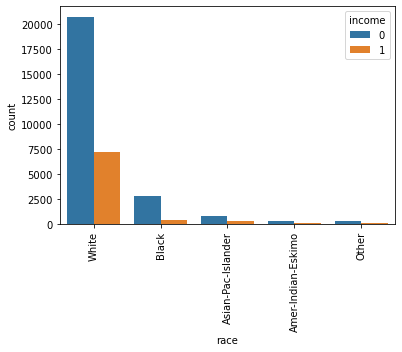

In [21]:
#rotating x labels
plt.xticks(rotation=90)

#plotting race against income
sns.countplot(x = 'race', hue = 'income', data = df)

As the proportion of black, asian-pac-islander, amer-indian-eskimo and other is very small, we will combine them in one class

In [22]:
#making two classes
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)

In [23]:
#counting unique values of race
df['race'].value_counts()

White    27816
Other     4745
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

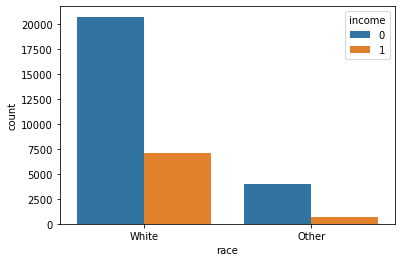

In [24]:
#again plotting race against income
sns.countplot(x = 'race', hue = 'income', data = df)

More percentage of white people earn more than 50k.

### Sex 

<AxesSubplot:xlabel='sex', ylabel='count'>

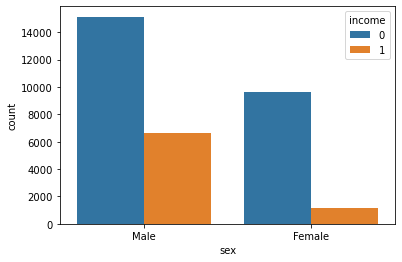

In [25]:
#plot sex against income
sns.countplot(x = 'sex', hue = 'income', data = df)

From above, we can conclude-

1) There are more Male than Female members.

2) We can see more percentage of Males have an Income of more than $50K than Females.

### Marital Status 

<AxesSubplot:xlabel='marital.status', ylabel='count'>

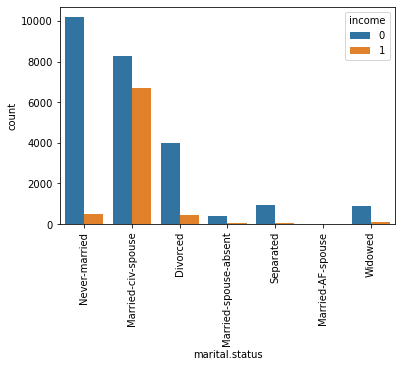

In [26]:
#plot marital status against income
plt.xticks(rotation=90)
sns.countplot(x = 'marital.status', hue = 'income', data = df)

More percentage of Married-civ-spouse people earn more than 50k.

### Relationship 

<AxesSubplot:xlabel='relationship', ylabel='count'>

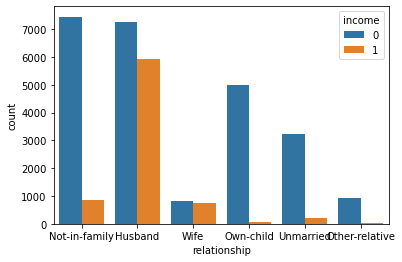

In [27]:
#plot relationship against income
sns.countplot(x = 'relationship', hue = 'income', data = df)

More percentage of people having relationship as husband earn more than 50k.

### Country 

In [28]:
#Replacing "?" values with Mode 
df["native.country"].replace("?",df["native.country"].mode()[0],inplace = True)

<AxesSubplot:xlabel='count', ylabel='native.country'>

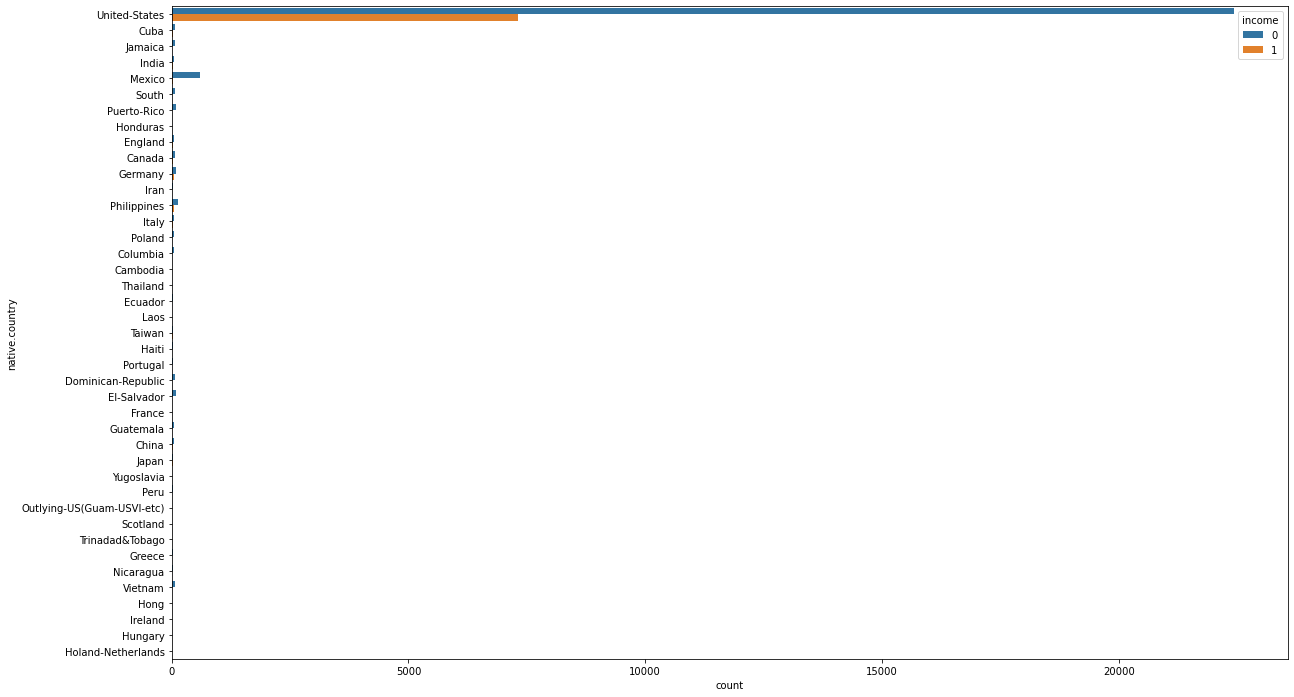

In [29]:
#plot country against income
plt.figure(figsize = (20, 12))
sns.countplot(y = 'native.country', hue = 'income', data = df)

The majority of adults are from United States. So, combining in two classes- united states and others.


In [30]:
#making a list countries of all countries in our dataset
countries = np.array(df['native.country'].unique())
countries = np.delete(countries, 0)

In [31]:
#replacing values with other
df['native.country'].replace(countries, 'other', inplace = True)

<AxesSubplot:xlabel='count', ylabel='native.country'>

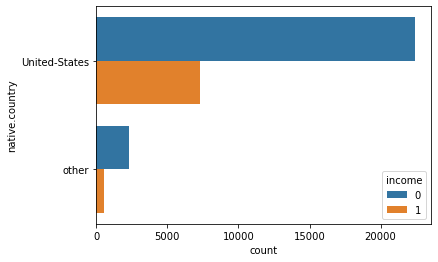

In [32]:
#now plot country against income
sns.countplot(y = 'native.country', hue = 'income', data = df)

More percentage of people from United States earn more than 50 than others.

### Age 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

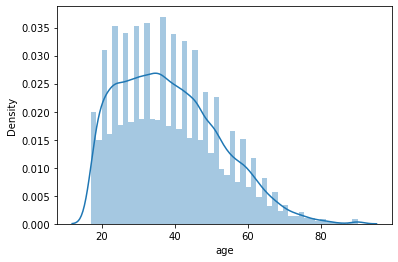

In [33]:
sns.distplot(df["age"])

People are from age group of 18 to 50. We can make separate bins of age as follows-

0-25: Young

25-50: Adult

50-100: Old

In [34]:
#making separate bins
df['age'] = pd.cut(df['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='age', ylabel='count'>

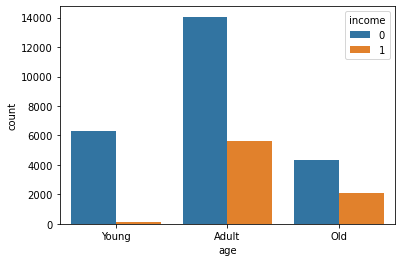

In [35]:
#plot age against income
sns.countplot(x = 'age', hue = 'income', data = df)

There are relatively less Young people who have an income more than $50K.



### Capital Gain and Capital Loss 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital.loss', ylabel='Density'>

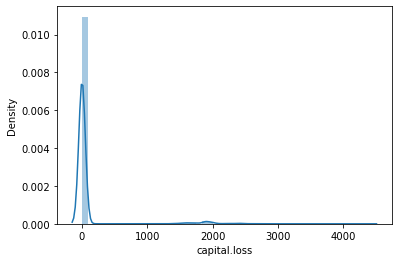

In [36]:
#plotting capital loss
sns.distplot(df["capital.loss"])

It is highy skewed towards left.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital.gain', ylabel='Density'>

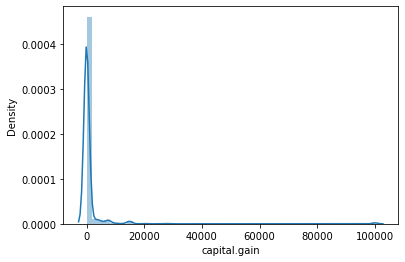

In [37]:
#plotting capital gain
sns.distplot(df["capital.gain"])

It is also highy skewed towards left.

Because of high skewness, scaling is required for better performance of our models. Aso, Capital difference give more relevant information than capital gain and capital loss.So,We will use capital difference and will drop the two respective columns.

In [38]:
#new column as capital difference
df['capital.diff'] = df['capital.gain'] - df['capital.loss']

#drop capital gain and capital loss column
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

In [39]:
#making bins in capital difference column
df['capital.diff'] = pd.cut(df['capital.diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])

<AxesSubplot:xlabel='capital.diff', ylabel='count'>

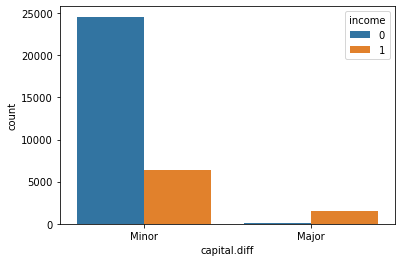

In [40]:
#plot capital difference against income
sns.countplot(x = 'capital.diff', hue = 'income', data = df)

As we can see, minor have more income greater than 50k, than major. So, people who have large Capital Gain compared to Capital Loss have Income more than $50K.

### Hours per week 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

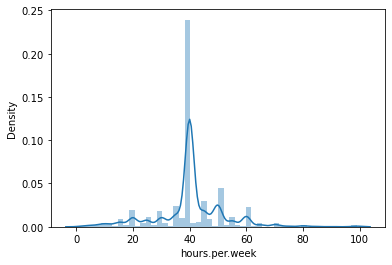

In [41]:
sns.distplot(df["hours.per.week"])

People are generally working for 30 hours to 40 hours per week.This can be split into bins as follwing-

0-30 hours- Less Hours

30-40 hours- Normal Hours

40-100- Extra Hours

In [42]:
#creating bins
df['hours.per.week'] = pd.cut(df['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Less Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='hours.per.week', ylabel='count'>

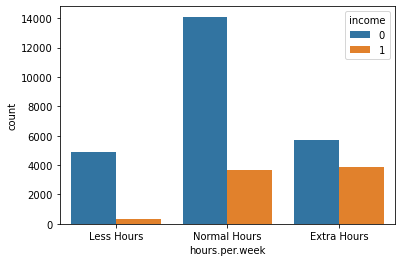

In [43]:
#plot hours per week against income
sns.countplot(x = 'hours.per.week', hue = 'income', data = df)

People working extra hours have income more than 50 k, than others.

### Final Weight


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

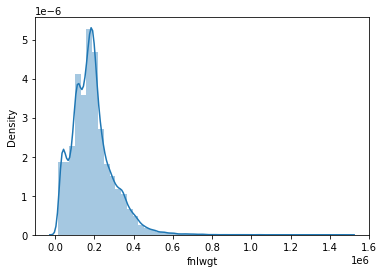

In [44]:
sns.distplot(df["fnlwgt"])

As, we can see it is highly left skewed, we will take log of the variable to correct the skewness.

In [45]:
df['log_fnlwgt']=np.log(df['fnlwgt'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_fnlwgt', ylabel='Density'>

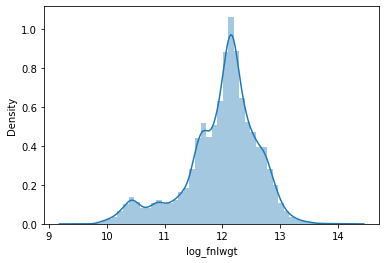

In [46]:
sns.distplot(df["log_fnlwgt"])

Now, log_fnlwgt anf fnlwgt,both depict same info, so we will drop fnlwgt column.

In [47]:
#drop fnlwgt
df.drop(['fnlwgt'], axis = 1, inplace = True)

Now, Making bins of log of final weight as-

0-11- Less Weight

11-12- Normal Weight

12-20- Extra Weight

In [48]:
#amking bins
df['log_fnlwgt'] = pd.cut(df['log_fnlwgt'], 
                                   bins = [0, 11, 12, 20], 
                                   labels = ['Less weight', 'Normal weight', 'Extra weight'])

<AxesSubplot:xlabel='log_fnlwgt', ylabel='count'>

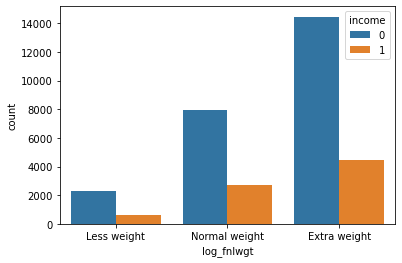

In [49]:
#plotting log_fnlwgt against income
sns.countplot(x = 'log_fnlwgt', hue = 'income', data = df)

People having extra weight earn more than 50k, than other people.

Now, seeing the first few rows of our dataset.

In [50]:
#first few rows of dataset
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.diff,log_fnlwgt
0,Adult,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Normal Hours,United-States,0,Minor,Normal weight
1,Adult,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Less Hours,United-States,0,Minor,Normal weight
2,Adult,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hours,United-States,0,Minor,Extra weight
3,Old,Private,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,Normal Hours,United-States,0,Minor,Extra weight
4,Adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,Normal Hours,other,0,Minor,Extra weight


In [51]:
#checking missing values
df.isnull().sum()

age               0
workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
capital.diff      0
log_fnlwgt        0
dtype: int64

No missing values.

# DATA MANIPULATION 

In [52]:
#setting independent and dependent variables
y = df['income']
X = df.drop(['income'], axis = 1)

As for modelling we need numerical data, so converting categorical data into numerical data using label encoding.

In [53]:
#using label encoding
X = pd.get_dummies(X)

In [54]:
from sklearn import preprocessing
X = preprocessing.scale(X)

Now, we will split data into test and train data set using train_test_split

In [55]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# MACHINE LEARNING MODELLING

In [56]:
#creating a list of accuracy scores
accuracies=[]

### Logistic Regression 

In [57]:
#import necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [58]:
#create an instance of linear regression
log = LogisticRegression()

In [59]:
#finding best parameters
param_grid = [
    {'C': [0.001,0.01,0.05,0.1,1,10,100]},
]
grid_search = GridSearchCV(log, param_grid, cv=5, scoring='neg_mean_squared_error')

In [60]:
#fitting on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [61]:
#selecting best parameters
grid_search.best_params_

{'C': 0.01}

In [62]:
#creating instance using best parameters
log_model = LogisticRegression(C=0.01, random_state=0)

In [63]:
#fitting model on train data
log_model.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [64]:
#making predictions
predictions = log_model.predict(X_test)

In [65]:
#calculating accuracy on test data
print("Logistic accuracy is %2.2f" % accuracy_score(y_test, log_model.predict(X_test)))

Logistic accuracy is 0.85


In [66]:
#using classification report to measure performance
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7407
           1       0.74      0.58      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [67]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))

[[6911  496]
 [ 982 1380]]


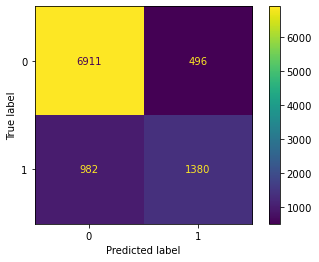

In [68]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, X_test, y_test)  
plt.show()

In [69]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

### Decision Tree 

In [70]:
#importing necessary library
from sklearn.tree import DecisionTreeClassifier


In [71]:
#Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

In [72]:
#finding best parameters
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(dt, param_grid, refit = True, verbose = 3) 

In [73]:
#fitting on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.760, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.760, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.760, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.760, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.760, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.760, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.760, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.760, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.760, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.760, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.760, total=   0.0

[CV]  max_leaf_nodes=6, min_samples_split=2, score=0.823, total=   0.2s
[CV] max_leaf_nodes=6, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=2, score=0.812, total=   0.1s
[CV] max_leaf_nodes=6, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=2, score=0.822, total=   0.1s
[CV] max_leaf_nodes=6, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=2, score=0.815, total=   0.2s
[CV] max_leaf_nodes=6, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=3, score=0.826, total=   0.1s
[CV] max_leaf_nodes=6, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=3, score=0.823, total=   0.1s
[CV] max_leaf_nodes=6, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=3, score=0.812, total=   0.1s
[CV] max_leaf_nodes=6, min_samples_split=3 ...........................

[CV]  max_leaf_nodes=10, min_samples_split=2, score=0.842, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=10, min_samples_split=2, score=0.838, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=10, min_samples_split=2, score=0.830, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=10, min_samples_split=2, score=0.842, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=10, min_samples_split=2, score=0.830, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=10, min_samples_split=3, score=0.842, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=10, min_samples_split=3, score=0.838, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_split=3 ...................

[CV]  max_leaf_nodes=13, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=13, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=13, min_samples_split=4, score=0.834, total=   0.1s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.845, total=   0.1s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.838, total=   0.1s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.834, total=   0.1s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=14, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=14, min_samples_split=2, score=0.836, total=   0.1s
[CV] max_leaf_nodes=14, min_samples_split=3 ...................

[CV]  max_leaf_nodes=17, min_samples_split=4, score=0.840, total=   0.1s
[CV] max_leaf_nodes=17, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=17, min_samples_split=4, score=0.834, total=   0.1s
[CV] max_leaf_nodes=17, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=17, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=17, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=17, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=2, score=0.846, total=   0.1s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=2, score=0.840, total=   0.1s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=2, score=0.834, total=   0.1s
[CV] max_leaf_nodes=18, min_samples_split=2 ...................

[CV]  max_leaf_nodes=21, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=21, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=3, score=0.837, total=   0.1s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.846, total=   0.1s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.834, total=   0.1s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.846, total=   0.1s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=21, min_samples_split=4, score=0.837, total=   0.1s
[CV] max_leaf_nodes=22, min_samples_split=2 ...................

[CV]  max_leaf_nodes=25, min_samples_split=3, score=0.847, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=25, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=25, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=25, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=25, min_samples_split=3, score=0.837, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=25, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=25, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=25, min_samples_split=4 ...................

[CV]  max_leaf_nodes=29, min_samples_split=2, score=0.846, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=29, min_samples_split=2, score=0.837, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=29, min_samples_split=3, score=0.847, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=29, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=29, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=29, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=29, min_samples_split=3, score=0.837, total=   0.1s
[CV] max_leaf_nodes=29, min_samples_split=4 ...................

[CV]  max_leaf_nodes=33, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=2, score=0.846, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=2, score=0.837, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=33, min_samples_split=3 ...................

[CV]  max_leaf_nodes=36, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=37, min_samples_split=2, score=0.846, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=37, min_samples_split=2, score=0.848, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=37, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=37, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=37, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=37, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=37, min_samples_split=3 ...................

[CV]  max_leaf_nodes=40, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=40, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=40, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=40, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=2, score=0.846, total=   0.1s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=2, score=0.849, total=   0.1s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=2, score=0.847, total=   0.2s
[CV] max_leaf_nodes=41, min_samples_split=2 ...................

[CV]  max_leaf_nodes=44, min_samples_split=3, score=0.836, total=   0.2s
[CV] max_leaf_nodes=44, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=44, min_samples_split=4, score=0.847, total=   0.2s
[CV] max_leaf_nodes=44, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=44, min_samples_split=4, score=0.849, total=   0.1s
[CV] max_leaf_nodes=44, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=44, min_samples_split=4, score=0.835, total=   0.2s
[CV] max_leaf_nodes=44, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=44, min_samples_split=4, score=0.842, total=   0.2s
[CV] max_leaf_nodes=44, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=44, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=45, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=45, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=45, min_samples_split=2 ...................

[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.849, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.842, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.836, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.849, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=48, min_samples_split=4 ...................

[CV]  max_leaf_nodes=52, min_samples_split=2, score=0.836, total=   0.2s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=52, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=52, min_samples_split=3, score=0.851, total=   0.2s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=52, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=52, min_samples_split=3, score=0.845, total=   0.2s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=52, min_samples_split=3, score=0.836, total=   0.1s
[CV] max_leaf_nodes=52, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=52, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=52, min_samples_split=4 ...................

[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.852, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.836, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.845, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.837, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.852, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.836, total=   0.1s
[CV] max_leaf_nodes=56, min_samples_split=3 ...................

[CV]  max_leaf_nodes=59, min_samples_split=4, score=0.847, total=   0.2s
[CV] max_leaf_nodes=59, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=59, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=60, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=60, min_samples_split=2, score=0.848, total=   0.1s
[CV] max_leaf_nodes=60, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=60, min_samples_split=2, score=0.850, total=   0.1s
[CV] max_leaf_nodes=60, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=60, min_samples_split=2, score=0.836, total=   0.2s
[CV] max_leaf_nodes=60, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=60, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=60, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=60, min_samples_split=2, score=0.836, total=   0.1s
[CV] max_leaf_nodes=60, min_samples_split=3 ...................

[CV]  max_leaf_nodes=63, min_samples_split=4, score=0.850, total=   0.1s
[CV] max_leaf_nodes=63, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=63, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=63, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=63, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=63, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=63, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.848, total=   0.1s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.850, total=   0.1s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=2, score=0.836, total=   0.1s
[CV] max_leaf_nodes=64, min_samples_split=2 ...................

[CV]  max_leaf_nodes=67, min_samples_split=3, score=0.836, total=   0.1s
[CV] max_leaf_nodes=67, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=67, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=67, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=67, min_samples_split=4, score=0.850, total=   0.1s
[CV] max_leaf_nodes=67, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=67, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=67, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=67, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=67, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=67, min_samples_split=4, score=0.836, total=   0.1s
[CV] max_leaf_nodes=68, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=68, min_samples_split=2, score=0.848, total=   0.1s
[CV] max_leaf_nodes=68, min_samples_split=2 ...................

[CV]  max_leaf_nodes=71, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=71, min_samples_split=3, score=0.847, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=71, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=71, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=71, min_samples_split=4, score=0.850, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=71, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=71, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=71, min_samples_split=4 ...................

[CV]  max_leaf_nodes=75, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=75, min_samples_split=3, score=0.850, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=75, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=75, min_samples_split=3, score=0.847, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=75, min_samples_split=3, score=0.836, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=75, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=75, min_samples_split=4, score=0.850, total=   0.1s
[CV] max_leaf_nodes=75, min_samples_split=4 ...................

[CV]  max_leaf_nodes=79, min_samples_split=2, score=0.846, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=2, score=0.836, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=3, score=0.850, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=3, score=0.846, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=3, score=0.836, total=   0.1s
[CV] max_leaf_nodes=79, min_samples_split=4 ...................

[CV]  max_leaf_nodes=83, min_samples_split=2, score=0.850, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=3, score=0.850, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=83, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=83, min_samples_split=3 ...................

[CV]  max_leaf_nodes=86, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=87, min_samples_split=2, score=0.848, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=87, min_samples_split=2, score=0.850, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=87, min_samples_split=2, score=0.834, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=87, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=87, min_samples_split=2, score=0.835, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=87, min_samples_split=3, score=0.848, total=   0.1s
[CV] max_leaf_nodes=87, min_samples_split=3 ...................

[CV]  max_leaf_nodes=90, min_samples_split=4, score=0.834, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=90, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=90, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=91, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.848, total=   0.1s
[CV] max_leaf_nodes=91, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.850, total=   0.1s
[CV] max_leaf_nodes=91, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.834, total=   0.1s
[CV] max_leaf_nodes=91, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=91, min_samples_split=2, score=0.847, total=   0.1s
[CV] max_leaf_nodes=91, min_samples_split=2 ...................

[CV]  max_leaf_nodes=94, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=94, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=94, min_samples_split=4, score=0.848, total=   0.1s
[CV] max_leaf_nodes=94, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=94, min_samples_split=4, score=0.850, total=   0.1s
[CV] max_leaf_nodes=94, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=94, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=94, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=94, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=94, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=94, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=95, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=95, min_samples_split=2, score=0.849, total=   0.1s
[CV] max_leaf_nodes=95, min_samples_split=2 ...................

[CV]  max_leaf_nodes=98, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=98, min_samples_split=3, score=0.847, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=98, min_samples_split=3, score=0.835, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=98, min_samples_split=4, score=0.849, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=98, min_samples_split=4, score=0.850, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=98, min_samples_split=4, score=0.835, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=98, min_samples_split=4, score=0.847, total=   0.1s
[CV] max_leaf_nodes=98, min_samples_split=4 ...................

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:  2.8min finished


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=8),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [74]:
#selecting best parameters
grid_search.best_params_

{'max_leaf_nodes': 57, 'min_samples_split': 2}

In [75]:
#creating instance using best parameter
dt_model = DecisionTreeClassifier(max_leaf_nodes= 57, min_samples_split= 2)

In [76]:
#fitting model on training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=57)

In [77]:
#making predictions
predictions = dt_model.predict(X_test)

In [78]:
#calculating accuracy on test data
print("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dt_model.predict(X_test)))

Decision Tree accuracy is 0.85


In [79]:
#using classification report to measure performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7407
           1       0.73      0.58      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [80]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))

[[6895  512]
 [ 990 1372]]


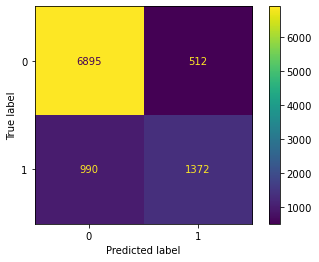

In [81]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, X_test, y_test)  
plt.show()

In [82]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

### Naive Bayes 

In [83]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()

In [84]:
# Train the model using the training sets
gnb = model.fit(X_train,y_train)

In [85]:
#making predictions
predictions = gnb.predict(X_test)

In [86]:
#calculating accuracy on test data
print("Naive Bayes accuracy is %2.2f" % accuracy_score(y_test, gnb.predict(X_test)))

Naive Bayes accuracy is 0.65


In [87]:
#using classification report to measure performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.56      0.71      7407
           1       0.41      0.95      0.57      2362

    accuracy                           0.65      9769
   macro avg       0.69      0.75      0.64      9769
weighted avg       0.83      0.65      0.67      9769



In [88]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[4121 3286]
 [ 125 2237]]
0.6508342716757088


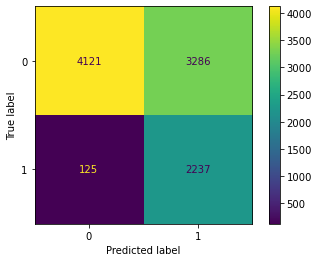

In [89]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()

In [90]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

###  Random Forest

In [91]:
#import necessary library
from sklearn.ensemble import RandomForestClassifier

In [92]:
#create instance for random forest
rf=RandomForestClassifier(n_estimators = 100, random_state = 0)

In [93]:
#findng best parameters
param_grid = [
    {'n_estimators': [3, 10, 30,50,80,100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

In [94]:
#fitting on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 80, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [95]:
#selecting best parameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 80}

In [96]:
#creating instance using best parameteres
rf_model = RandomForestClassifier(max_features=4, n_estimators=80, random_state=0)

In [97]:
#fitting on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=80, random_state=0)

In [98]:
#making predictions
predictions = rf_model.predict(X_test)

In [99]:
#calculating accuracy on test data
print("Random Forest accuracy is %2.2f" % accuracy_score(y_test, rf_model.predict(X_test)))

Random Forest accuracy is 0.84


In [100]:
#using classification report to measure performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7407
           1       0.69      0.61      0.65      2362

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.83      0.84      0.84      9769



In [101]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))

[[6766  641]
 [ 932 1430]]


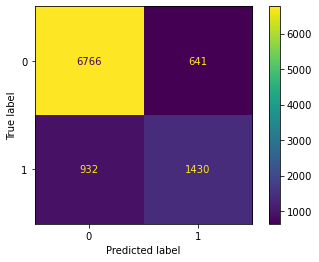

In [102]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, X_test, y_test)  
plt.show()

In [103]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

### Support vector classifier 

In [104]:
#import necessary library
from sklearn.svm import SVC

In [105]:
#create instance for svc
svc = SVC()

In [106]:
#finding best parameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}    
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [177]:
#fitting on training data
#grid_search.fit(X_train, y_train)
##take long time to run

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.773, total= 1.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.772, total= 1.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total= 1.9min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.772, total= 2.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.774, total= 3.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total= 2.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.793, total= 1.4min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.787, total= 1.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.790, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.852, total=  30.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.853, total=  27.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.841, total=  26.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.847, total=  26.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.845, total=  28.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.853, total=  20.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.851, total=  25.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.847, total= 1.2min
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.846, total= 1.3min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.854, total=  25.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.851, total=  25.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.838, total=  24.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.852, total=  24.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.841, total=  24.7s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 176.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [178]:
#selecting best parameters
#grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [107]:
#creating instace using best parameters
svc_model = SVC(C= 100, gamma= 0.001, kernel= 'rbf')

In [108]:
#fitting on train data
svc_model.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [109]:
#making predictions
predictions = svc_model.predict(X_test)

In [110]:
#calculating accuracy on test data
print("Support Vector Classifier accuracy is %2.2f" % accuracy_score(y_test, svc_model.predict(X_test)))

Support Vector Classifier accuracy is 0.85


In [111]:
#using classification report to measure performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7407
           1       0.75      0.57      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [112]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))

[[6951  456]
 [1012 1350]]


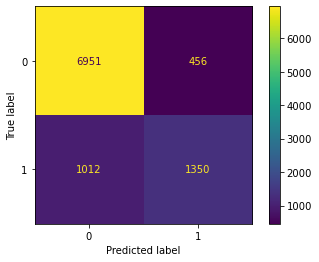

In [113]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, X_test, y_test)  
plt.show()

In [114]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

### Gradient Boosting Classifier 

In [115]:
#import necessary library
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
#create instance for gradient boosting classifier
gbc = GradientBoostingClassifier(random_state = 0)

In [117]:
#finding best parameters
param_grid = {'max_depth':range(5,10,3), 'min_samples_split':range(200,1001,300)}
grid_search = GridSearchCV(gbc, param_grid, cv=2, scoring='neg_mean_squared_error')

In [118]:
#fitting on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': range(5, 10, 3),
                         'min_samples_split': range(200, 1001, 300)},
             scoring='neg_mean_squared_error')

In [119]:
#selecting best parameters
grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 800}

In [120]:
#creating instance using best parameters
gbc_model = GradientBoostingClassifier(max_depth=8, min_samples_split=800, random_state=0)

In [121]:
#fitting model on training data
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, min_samples_split=800, random_state=0)

In [122]:
#making predictions
predictions = gbc_model.predict(X_test)

In [123]:
#calculating accuracy on test data
print("Gradient Boosting Classifier accuracy is %2.2f" % accuracy_score(y_test, gbc_model.predict(X_test)))

Gradient Boosting Classifier accuracy is 0.85


In [124]:
#using classification report to measure performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7407
           1       0.73      0.61      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [125]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))

[[6874  533]
 [ 916 1446]]


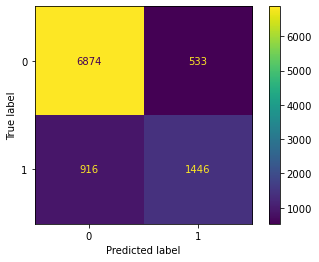

In [126]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc_model, X_test, y_test)  
plt.show()

In [127]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

### KNeighbours

In [128]:
#import necessary library
from sklearn.neighbors import KNeighborsClassifier

In [129]:
#create an instance for k Neighbors classifier
knn =  KNeighborsClassifier()

In [130]:
#finding best parameters
param_grid = {'n_neighbors':range(6,10,1)}
grid_search = GridSearchCV(knn, param_grid, cv=2, scoring='neg_mean_squared_error')

In [131]:
#fitting model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(6, 10)},
             scoring='neg_mean_squared_error')

In [132]:
#selecting best parameters
grid_search.best_params_

{'n_neighbors': 8}

In [133]:
#creating instance using best parameters
knn_model = KNeighborsClassifier(n_neighbors=8)

In [134]:
#train the model using the training sets
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [135]:
#making predictions
predictions = knn_model.predict(X_test)

In [136]:
#calculating accuracy on test data
print("KNeighbors Classifier accuracy is %2.2f" % accuracy_score(y_test, knn_model.predict(X_test)))

KNeighbors Classifier accuracy is 0.84


In [137]:
#using classification report to measure performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7407
           1       0.72      0.55      0.63      2362

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [138]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))

[[6904  503]
 [1059 1303]]


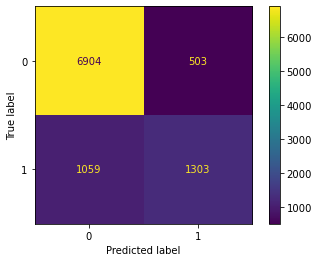

In [139]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test)  
plt.show()

In [140]:
#accuracy score 
acc=accuracy_score(y_test, predictions)*100

#adding to the list accuracies
accuracies.append(acc)

In [141]:
#printing list accuracies
accuracies

[84.87050875217524,
 84.62483365748797,
 65.08342716757089,
 83.89804483570478,
 84.97287337496161,
 85.1673661582557,
 84.01064592076978]

In [142]:
#creating list of classifier name
classifier_names = ["Logistic Regression",
                    "Decision Tree Classifier",
                    "Gaussian Naive Bayes", 
                    "Random Forest Classifier",
                    "Support Vector Classifier", 
                    "Gradient Boosting Classifier",
                   "KNeighbors Classifier"]

#creating list of classifiers using best parameters
classifiers = [LogisticRegression(C=0.01, random_state=0),
               DecisionTreeClassifier(max_leaf_nodes= 57, min_samples_split= 2),
               GaussianNB(),
               RandomForestClassifier(max_features=4, n_estimators=80, random_state=0),
               SVC(C= 100, gamma= 0.001, kernel= 'rbf', probability=True),
               GradientBoostingClassifier(max_depth=8, min_samples_split=800, random_state=0),
              KNeighborsClassifier(n_neighbors=8)]


In [143]:
#creating dataframe of accuracy scores and classifier names
df1=pd.DataFrame(accuracies,columns = ['Accuracy Scores'],index = classifier_names).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

In [144]:
#printing dataframe of accuracy scores and classifier names
print(df1)

                              Accuracy Scores
Gradient Boosting Classifier        85.167366
Support Vector Classifier           84.972873
Logistic Regression                 84.870509
Decision Tree Classifier            84.624834
KNeighbors Classifier               84.010646
Random Forest Classifier            83.898045
Gaussian Naive Bayes                65.083427


<ipython-input-145-87234d962234>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90)


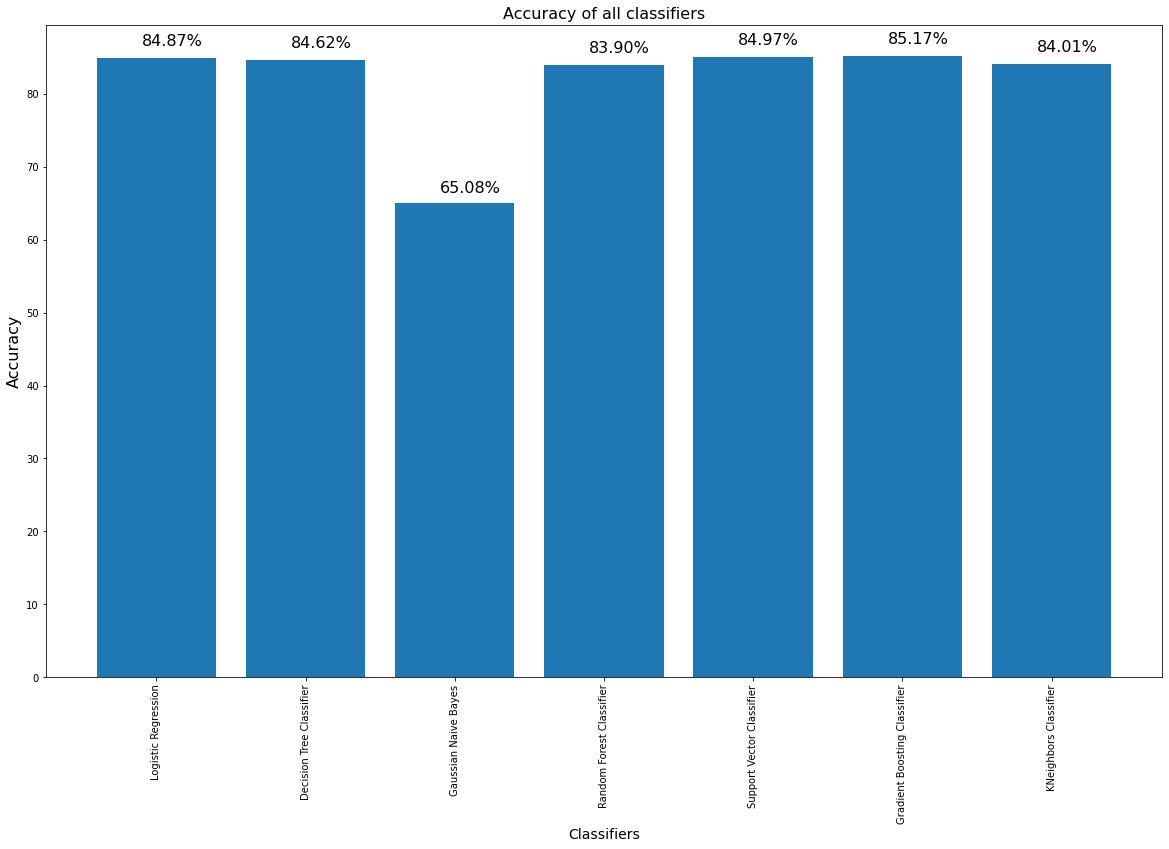

In [145]:
#increasing figure size
plt.figure(figsize = (20, 12))

#rotating x lable to 90 degrees
plt.xticks(Rotation=90)

#plotting bar graph of accuracy scores of different classifers
barplot = plt.bar(classifier_names,accuracies)

#adding labels on axis and ajusting size
plt.xlabel("Classifiers",fontsize=14)
plt.ylabel("Accuracy",fontsize=16)

#adding title
plt.title("Accuracy of all classifiers",fontsize=16)

#adding accuracy score text on the bar
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

Here we can see, Support vector classifier and Gradient Boosting classifier are giving more accuracy than others.

# AUC-ROC

In [146]:
#importing f1 score 
from sklearn.metrics import f1_score

#caculating F1 score of all classifiers
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))

Logistic Regression:
F1 score: 0.65
Decision Tree Classifier:
F1 score: 0.65
Gaussian Naive Bayes:
F1 score: 0.57
Random Forest Classifier:
F1 score: 0.65
Support Vector Classifier:
F1 score: 0.65
Gradient Boosting Classifier:
F1 score: 0.67
KNeighbors Classifier:
F1 score: 0.63


The F-score is a way of combining the precision and recall of the model. An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0. Based on the above results, the Gradient Boosting Classifier performed the best with the highest F1 score.

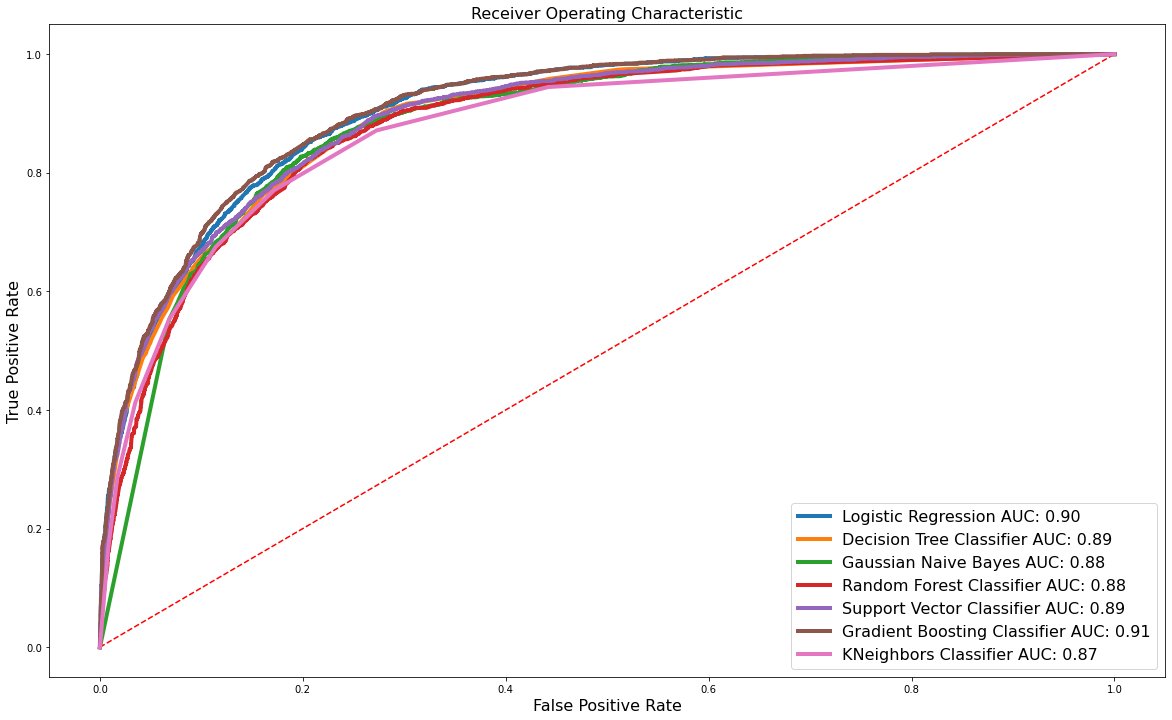

In [147]:
#importing roc curve and auc
from sklearn.metrics import roc_curve, auc

#plotting roc curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

#plotting for all classifiers
for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, label = label, linewidth = 4)

#adding labels,title and adjusting their size
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

The KNeighbor Classifier appears to have the lowest Area Under Curve. The Gradient Boosting Classifier again performed the best here with the maximum Area Under Curve of 0.91.